This dataset gives the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The target variable is "Y" has the client subscribed a term deposit? (binary: 'yes','no')

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

Attribute Information:

Input variables:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
social and economic context attributes


Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

The goal is to predict if the customer would subscribe to the term deposit or not. This is a classification problem.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
## read the csv data
bank_data = pd.read_csv('~/Documents/DataScience/Bank/bank.csv')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
import pandas_profiling

In [ ]:
profile = bank_data.profile_report(title='Pandas Profiling Report', \
                              plot={'histogram': {'bins': 8}})

profile.to_file(output_file="output.html")

In [ ]:
bank_data.info()


In [ ]:
bank_data.describe().T


In [ ]:
bank_data.shape

In [ ]:
bank_data.isnull().sum()

In [13]:
## Determine the categorial features in the dataset
categorical_features = [col for col in bank_data.columns \
                        if pd.api.types \
                        .is_string_dtype(bank_data[col])]
print(categorical_features)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [14]:
## Determine the non categorical features in the data set
non_categorical_features = [col for col in bank_data.columns \
                        if not pd.api.types \
                        .is_string_dtype(bank_data[col])]
print(non_categorical_features)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [ ]:
## count the number of missing values(Zero's) on non-categorical column
num_missing = (bank_data[['age','balance','day','duration','campaign','pdays','previous']] == 0).sum()
print(num_missing)

In [ ]:
## percentage of the missing values(zero's)
print(num_missing/bank_data.shape[0])

Since the number previous contacts for the client could be zero, and also the client can have zero balance in the account so don't have to treat the missing zeros.

In [ ]:
import missingno as msno
## plot the missing values
msno.bar(bank_data,color='red',labels=True,sort="ascending")

In [ ]:
##Identify the outliers
import statistics
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(random_data):
    anomalies = []
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(random_data)
    random_data_mean = statistics.mean(random_data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    print("Lower Limit: ",lower_limit)
    print("Upper Limit: ",upper_limit)
    # Generate outliers
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

In [ ]:
find_anomalies(bank_data['age']).value

In [ ]:
## Box Plot to determine the outliers
sns.set(palette = 'pastel', rc = {"figure.figsize": (12,8), "axes.titlesize" : 18, "axes.labelsize" : 16, 
            "xtick.labelsize" : 16, "ytick.labelsize" : 16 })

duration = sns.boxplot(bank_data['duration'])
plt.show(duration)

age = sns.boxplot(bank_data['age'])
plt.show(age)

balance = sns.boxplot(bank_data['balance'])
plt.show(balance)

campaign = sns.boxplot(bank_data['campaign'])
plt.show(campaign)

pdays = sns.boxplot(bank_data['pdays'])
plt.show(pdays)

previous = sns.boxplot(bank_data['previous'])
plt.show(previous)

There are outliers on balance(can't be negative) and duration(can't be negative). Age has some outliers. Campaign has negative. Looks like have to do normalization and standardization.

In [ ]:
## Rows greater than age 73
bank_data[bank_data['age'] > 73]

In [ ]:
## Normalization to fix the outliers

from sklearn.preprocessing import MinMaxScaler


In [ ]:
bank_data.head()

In [ ]:
bank_noncat = bank_data[['age','balance','duration']]
bank_noncat.head()

In [ ]:
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(bank_noncat)
print(scaled)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:

# define standard scaler
scaler = StandardScaler()
# transform data
scaled2 = scaler.fit_transform(bank_noncat)
print(scaled2)

In [ ]:
# convert the array back to a dataframe
dataset = pd.DataFrame(bank_data)
# histograms of the variables
dataset.hist()
plt.show()

In [ ]:
bank_data['pdays'].describe()

mean shows as 39, but the min, 25%, 50% showing as -1, so droped the rows with -1 that is customers who have not been contacted previously.

In [3]:
bank_data_proc = bank_data.copy()

In [ ]:
#bank_data_proc.drop(bank_data_proc[bank_data_proc['pdays'] < 0].index,inplace = True)

In [9]:
bank_data_proc = bank_data_proc.drop(columns=['pdays'])

In [10]:
bank_data_proc.describe()

,age,balance,day,duration,campaign,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,25.000000


In [11]:
## Baseline on the number of customers 
bank_data_proc['y'].value_counts(normalize = True)

no     0.88476
yes    0.11524
Name: y, dtype: float64

As per the data 11% of the customers are likely to subscribe to the term deposit and 88% are not.So the model accuracy on the customers likelihood to subscribe should be greater than 11%

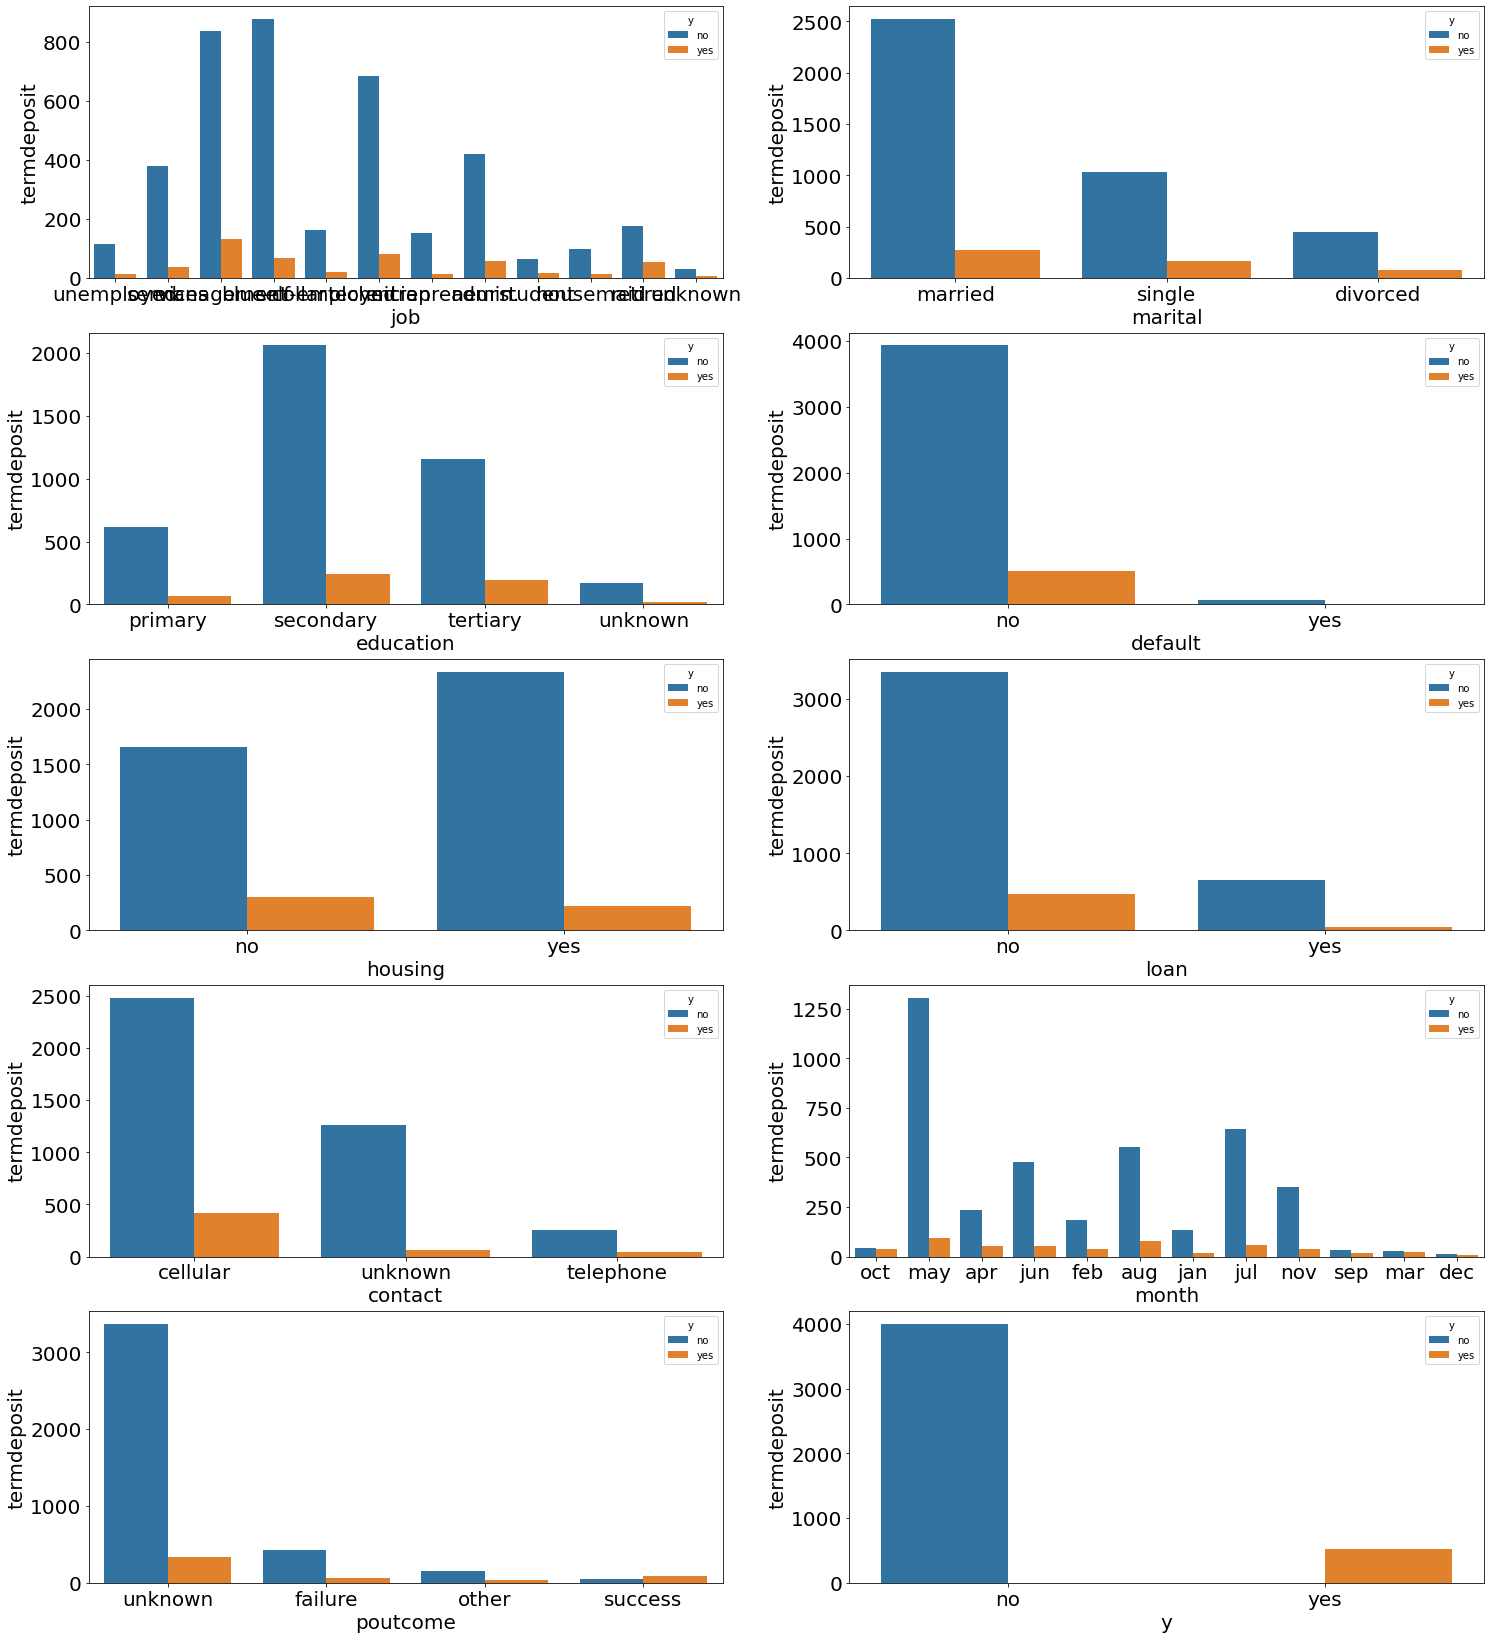

In [15]:
## plot distributions of categorical features

plt.figure(figsize=(25,35)) 
for index, col in enumerate(categorical_features): 
    plt.subplot(6, 2, index+1) 
    ax = sns.countplot(x=col, data=bank_data_proc, hue="y") 
    ax.set_xlabel(col, fontsize=20) 
    ax.set_ylabel("termdeposit", fontsize=20) 
    ax.tick_params(labelsize=20)

In [16]:
## count plot on job Vs termdeposit
pd.crosstab(bank_data_proc.job,bank_data_proc.y, normalize='index', margins=True)

y,no,yes
job,,
admin.,0.878661,0.121339
blue-collar,0.927061,0.072939
entrepreneur,0.910714,0.089286
housemaid,0.875000,0.125000
management,0.864809,0.135191
retired,0.765217,0.234783
self-employed,0.890710,0.109290
services,0.908873,0.091127
student,0.773810,0.226190


In [21]:
## count plot on loan Vs termdeposit
pd.crosstab(bank_data_proc.loan,bank_data_proc.y, normalize='index', margins=True)

y,0,1
loan,,
no,0.875196,0.124804
yes,0.937771,0.062229
All,0.884760,0.115240


In [23]:
## count plot on marital Vs termdeposit
pd.crosstab(bank_data_proc.marital,bank_data_proc.y, normalize='index', margins=True)

y,0,1
marital,,
divorced,0.854167,0.145833
married,0.900965,0.099035
single,0.860368,0.139632
All,0.884760,0.115240


In [22]:
## count plot on housing Vs termdeposit
pd.crosstab(bank_data_proc.housing,bank_data_proc.y, normalize='index', margins=True)

y,0,1
housing,,
no,0.846585,0.153415
yes,0.914029,0.085971
All,0.884760,0.115240


In [17]:
## count plot on age Vs termdeposit
pd.crosstab(bank_data_proc.age,bank_data_proc.y, normalize='index', margins=True)

y,no,yes
age,,
19,0.500000,0.500000
20,0.666667,0.333333
21,0.857143,0.142857
22,0.666667,0.333333
23,0.900000,0.100000
...,...,...
83,0.500000,0.500000
84,0.000000,1.000000
86,1.000000,0.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>],
       [<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'duration'}>],
       [<AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'previous'}>]], dtype=object)

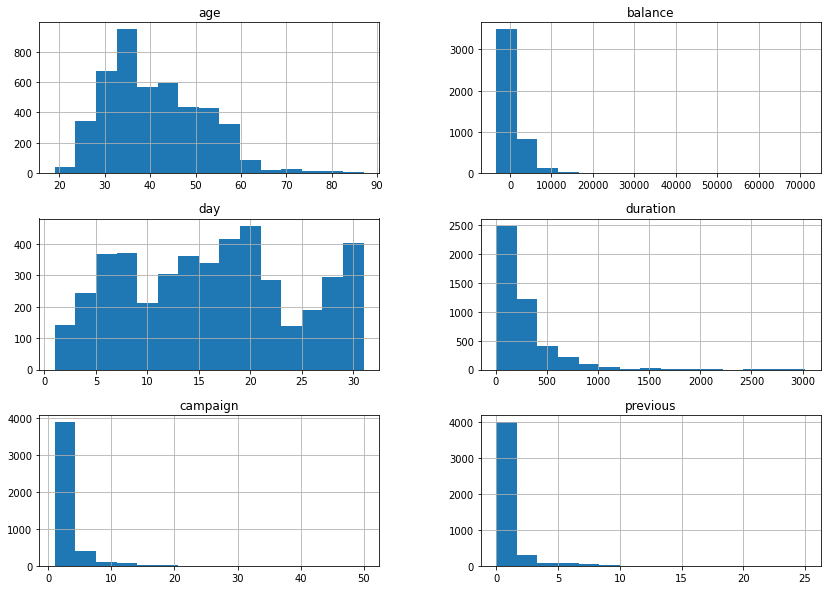

In [18]:
bank_data_proc.hist(figsize=(14,10),bins=15)

In [19]:
## Replace the target variable y and transpose the yes & no to boolen values 
#so correlation can be drawn
bank_data_proc.replace({'y': {"yes": 1, 'no':0}}, inplace=True)


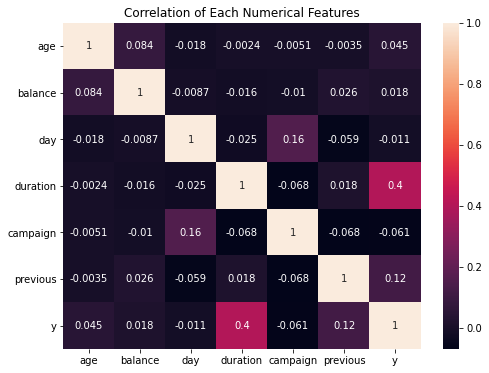

In [20]:
## Identify the correlation
plt.figure(figsize=(8,6))
sns.heatmap(bank_data_proc.corr(),annot=True)
plt.title("Correlation of Each Numerical Features")
plt.show()

Only duration seems to have high correlation with target variable whereas other variables does not seem to have correlation

Insights:
Customers are who are more likely to subscribe for the term deposits are
1. Married
2. Secondary Education
3. Not credit defaulter
4. no housing loans
5. no personal loans
6. job : retired and students

Customers who are contacted via cellular are likely to subscribe compared to other contact modes.

Customers tend to subscribe more in the month of May. 
The customers whose previous marketing campaign is success they are more likely to subscribe.

Which age grouo??